# Figure4

## Data manipulation for Calculating concentration of each lipid with different treatment

In [ ]:
# Load necessary libraries
library(readxl)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: viridisLite

Registering fonts with R

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor

The following object is masked from 'package:viridis':

    viridis_pal


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

  GlobalID Molecule.List            LipidMolecule Sample Concentration
1       10           Cer    Cer(d16:0_16:1)+O:(s)     19     0.2152289
2       13           Cer Cer(d18:1_24:1)+2O:(s)_A     19     0.1063906
3       16           Cer          Cer(d18:0_14:0)     19     0.5464841
4       17           Cer        Cer(d18:0_15:0)_A     19     0.1807421
5       25           Cer        Cer(d18:0_16:0)_B     19     1.0723055
6       26           Cer   Cer(d19:0_19:0)+2O:(s)     19     0.2034396
           Treatment
1 Ambient_No_drought
2 Ambient_No_drought
3 Ambient_No_drought
4 Ambient_No_drought
5 Ambient_No_drought
6 Ambient_No_drought

## Calculation of Shannon entropy Hj

`summarise()` has grouped output by 'Sample'. You can override using the
`.groups` argument.

# A tibble: 12 × 2
   Sample   H_j
    <dbl> <dbl>
 1     19  6.43
 2     22  6.33
 3     27  6.48
 4     28  6.45
 5     35  6.68
 6     36  6.98
 7     40  6.89
 8     43  6.37
 9     44  6.33
10     48  6.35
11     49  6.33
12     52  6.35

# A tibble: 6 × 2
  LipidMolecule    S_i
  <chr>          <dbl>
1 C18H35O16P    0.0950
2 C21H38O4      0.276 
3 C23H48O3      0.0755
4 C25H41O12P    0.0910
5 C25H49O12P    0.133 
6 C27H54NO7P    0.0665

# A tibble: 6 × 3
# Groups:   Sample [1]
  Sample LipidMolecule    S_ij
   <dbl> <chr>           <dbl>
1     19 C18H35O16P    -0.467 
2     19 C21H38O4       0.781 
3     19 C23H48O3      -0.514 
4     19 C25H41O12P    -0.0270
5     19 C25H49O12P    -0.252 
6     19 C27H54NO7P     0.290 

# A tibble: 12 × 2
   Sample delta_j
    <dbl>   <dbl>
 1     19   0.153
 2     22   0.226
 3     27   0.126
 4     28   0.244
 5     35   0.130
 6     36   0.145
 7     40   0.144
 8     43   0.140
 9     44   0.129
10     48   0.154
11     49   0.151
12     52   0.192

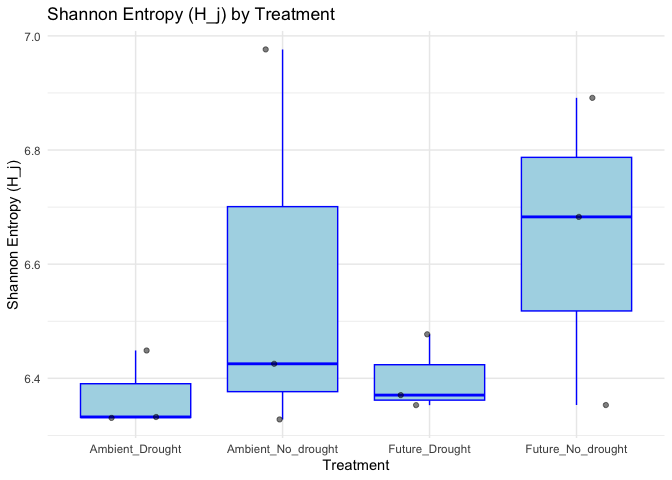

In [ ]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)
library(viridis)

# Load the Excel file
file_path <- "information-theory-indices1.xlsx"
data <- read_excel(file_path, sheet = "Sheet1")

# Step 1: Calculate P_ij (relative frequency) for each molecule in each sample
data_grouped <- data %>%
  group_by(Sample) %>%
  mutate(P_ij = Concentration / sum(Concentration))

# Step 2: Calculate H_j (Shannon entropy) for each sample
H_j <- data_grouped %>%
  group_by(Sample) %>%
  summarize(H_j = -sum(P_ij * log2(P_ij), na.rm = TRUE))

# Step 3: Calculate P_i (average frequency) for each molecule
P_i <- data_grouped %>%
  group_by(LipidMolecule) %>%
  summarize(P_i = mean(P_ij))

# Step 4: Calculate S_i (specificity) for each molecule
S_i <- data_grouped %>%
  left_join(P_i, by = "LipidMolecule") %>%
  group_by(LipidMolecule) %>%
  summarize(S_i = (1/n_distinct(Sample)) * sum((P_ij / P_i) * log2(P_ij / P_i), na.rm = TRUE))

# Step 5: Calculate S_ij (individual specificity) for each molecule in each sample
S_ij <- data_grouped %>%
  left_join(P_i, by = "LipidMolecule") %>%
  group_by(Sample, LipidMolecule) %>%
  summarize(S_ij = sum((P_ij / P_i) * log2(P_ij / P_i), na.rm = TRUE))

ℹ Please use the `linewidth` argument instead.

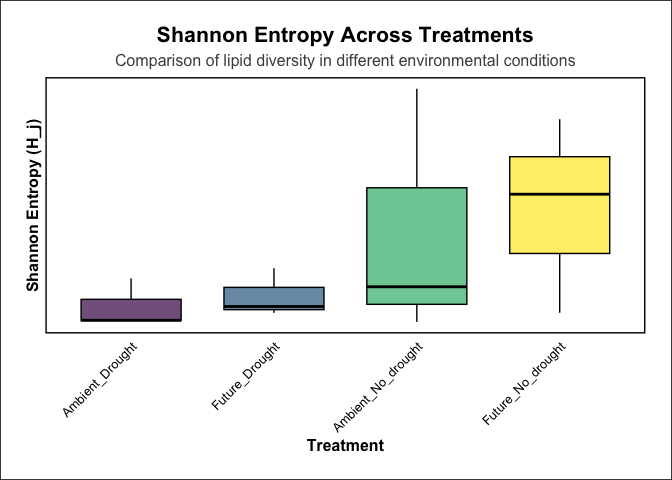

In [ ]:
# Calculate median H_j for each treatment
H_j_median <- H_j_with_treatment %>%
  group_by(Treatment) %>%
  summarize(median_H_j = median(H_j)) %>%
  arrange(median_H_j)

# Reorder the Treatment factor based on median H_j
H_j_with_treatment$Treatment <- factor(H_j_with_treatment$Treatment, 
                                       levels = H_j_median$Treatment)

# Create the enhanced plot
p <- ggplot(H_j_with_treatment, aes(x = Treatment, y = H_j, fill = Treatment)) +
  geom_boxplot(width = 0.7, color = "black", alpha = 0.7) +
  scale_fill_viridis(discrete = TRUE, option = "D") +
  theme_minimal(base_size = 12) +
  theme(
    legend.position = "none",
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1),
    axis.text = element_text(color = "black"),
    axis.title = element_text(face = "bold"),
    panel.grid.major.x = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_rect(color = "black", fill = NA, size = 1),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 16),
    plot.subtitle = element_text(hjust = 0.5, size = 12, color = "grey30"),
    plot.caption = element_text(hjust = 1, size = 10, color = "grey50"),
    plot.background = element_rect(fill = "white"),
    plot.margin = margin(t = 20, r = 20, b = 20, l = 20, unit = "pt")
  ) +
  labs(
    title = "Shannon Entropy Across Treatments",
    subtitle = "Comparison of lipid diversity in different environmental conditions",
    x = "Treatment",
    y = "Shannon Entropy (H_j)"
  ) +
  scale_y_continuous(breaks = seq(7.3, 7.8, by = 0.1), 
                     labels = sprintf("%.1f", seq(7.3, 7.8, by = 0.1)))

`summarise()` has grouped output by 'Treatment'. You can override using the
`.groups` argument.

increasing max.overlaps

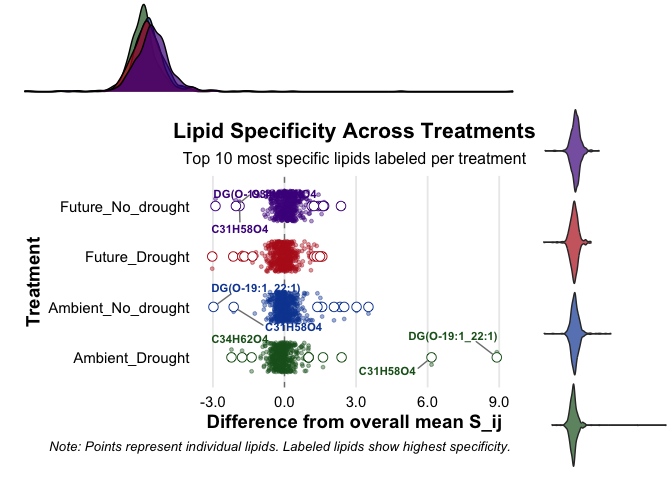

increasing max.overlaps

In [ ]:
# First, let's join the treatment information to S_ij
S_ij_with_treatment <- S_ij %>%
  left_join(sample_treatments, by = "Sample")

# Now, let's aggregate S_ij by treatment and lipid molecule
S_ij_by_treatment <- S_ij_with_treatment %>%
  group_by(Treatment, LipidMolecule) %>%
  summarize(mean_S_ij = mean(S_ij, na.rm = TRUE)) %>%
  ungroup()